### Velocity structure comparison during upwelling

(Upstream vs. downstream canyon)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import xarray as xr

In [2]:
def calc_rho(RhoRef, T, S, alpha=2.0E-4, beta=7.4E-4):
    """-----------------------------------------------------------------------------
    calc_rho calculates the density profile using a linear equation of state.
    
    INPUT:
    state: xarray dataframe
    RhoRef : reference density at the same z as T and S slices. Can be a scalar or a 
             vector, depending on the size of T and S.
    T, S   : should be 4D arrays 
    alpha = 2.0E-4 # 1/degC, thermal expansion coefficient
    beta = 7.4E-4, haline expansion coefficient
    OUTPUT:
    rho - Density [nz]
    -----------------------------------------------------------------------------"""
    rho = RhoRef*(np.ones(np.shape(T)) - alpha*(T) + beta*(S))
    return rho

def unstagger(ugrid, vgrid):
    """ Interpolate u and v component values to values at grid cell centres (from D.Latornell for NEMO output).
    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.
    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`
    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`
    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u, v

def rotate(x_comp, y_comp, angle):
    '''Input:
        x_comp:: x component of vector
        y_comp:: y component of vector
       angle:: in radians.
       Returns:
       Rotated componets of vector x_rot and y_rot'''
    x_rot = x_comp*np.cos(angle)-(y_comp)*np.sin(angle)
    y_rot = x_comp*np.sin(angle)+(y_comp)*np.cos(angle)
    return(x_rot, y_rot)

def trans_polar(r,th,r0,th0):
    rprime = (r**2+r0**2+2*r*r0*np.cos(th0-th))**0.5
    thprime = np.arccos((r*np.cos(th)+r0*np.cos(th0))/rprime)
    return(rprime,thprime)

def plot_model_rad_vel(tt, thmesh, rmesh, nz1, nz2, nz3,vmin, vmax, cbar_ticks):

    fig = plt.figure(figsize=(14.5,4.5))
    ax0 = fig.add_subplot(131, projection='polar')
    ax1 = fig.add_subplot(132, projection='polar')
    ax2 = fig.add_subplot(133, projection='polar')

    ax0.set_facecolor('beige')
    ax1.set_facecolor('beige')
    ax2.set_facecolor('beige')

    # depth nz1 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    U = ux / np.sqrt(ux**2 + uy**2);
    V = uy / np.sqrt(ux**2 + uy**2);
    
    pcm1 = ax0.pcolormesh(Th,R,1E2*rvel,cmap=cmo.cm.balance, vmin=vmin, vmax=vmax)
    cbar_ax = fig.add_axes([0.05, 0.2, 0.016, 0.55])
    cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
    cb.ax.yaxis.set_tick_params(pad=1)
    cb.set_label(r'$u_{r}$ / cms$^{-1}$')
    ax0.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')
    qv = ax0.quiver(thmesh[::5,::5],rmesh[::5,::5],
                    U[::5,::5],V[::5,::5],scale=30, 
                    color='k', units='width',pivot='middle')
    r1_dns1 = 130
    th1_dns1 = 277
    ur_dns_1 = 1E2*rvel[r1_dns1,th1_dns1]
    
    r1_ups1 = 130
    th1_ups1 = 287
    ur_ups_1 =1E2*rvel[r1_ups1,th1_ups1]
    
    r1_dns2 = 130
    th1_dns2 = 222
    ur_dns_2 =1E2*rvel[r1_dns2,th1_dns2]
    
    r1_ups2 = 130
    th1_ups2 = 232
    ur_ups_2 =1E2*rvel[r1_ups2,th1_ups2]
       
    # depth 4.5 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz2,:,:].data,state.V[tt,nz2,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz2,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz2,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    U = ux / np.sqrt(ux**2 + uy**2);
    V = uy / np.sqrt(ux**2 + uy**2);
   
    pcm2 = ax1.pcolormesh(Th,R,1E2*rvel,cmap=cmo.cm.balance, vmin=vmin, vmax=vmax)
    ax1.contour(Th,R,grid.Depth.data,levels=[0.045],colors='k')
    qv = ax1.quiver(thmesh[::5,::5],rmesh[::5,::5],
                    U[::5,::5],V[::5,::5],scale=30, 
                    color='k', units='width',pivot='middle')
    r2_dns1 = 121
    th2_dns1 = 277
    ur2_dns_1 = 1E2*rvel[r2_dns1,th2_dns1]
    
    r2_ups1 = 121
    th2_ups1 = 287
    ur2_ups_1 =1E2*rvel[r2_ups1,th2_ups1]
    
    r2_dns2 = 121
    th2_dns2 = 221
    ur2_dns_2 =1E2*rvel[r2_dns2,th2_dns2]
    
    r2_ups2 = 121
    th2_ups2 = 232
    ur2_ups_2 =1E2*rvel[r2_ups2,th2_ups2]

    # depth 6.0 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz3,:,:].data,state.V[tt,nz3,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz3,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz3,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    U = ux / np.sqrt(ux**2 + uy**2);
    V = uy / np.sqrt(ux**2 + uy**2);
   
    pcm3 = ax2.pcolormesh(Th,R,1E2*rvel,cmap=cmo.cm.balance, vmin=vmin, vmax=vmax)
    ax2.contour(Th,R,grid.Depth.data,levels=[0.06],colors='k')
    qv = ax2.quiver(thmesh[::5,::5],rmesh[::5,::5],
                    U[::5,::5],V[::5,::5],scale=30, 
                    color='k', units='width',pivot='middle')
    r3_dns1 = 112
    th3_dns1 = 277
    ur3_dns_1 = 1E2*rvel[r3_dns1,th3_dns1]
    
    r3_ups1 = 112
    th3_ups1 = 287
    ur3_ups_1 =1E2*rvel[r3_ups1,th3_ups1]
    
    r3_dns2 = 112
    th3_dns2 = 221
    ur3_dns_2 =1E2*rvel[r3_dns2,th3_dns2]
    
    r3_ups2 = 112
    th3_ups2 = 232
    ur3_ups_2 =1E2*rvel[r3_ups2,th3_ups2] 
    
    ax0.text(0.5,.9,'Depth = %1.2f cm'%(100*grid.RC[nz1]),transform=ax0.transAxes)
    ax1.text(0.5,.9,'Depth = %1.2f cm'%(100*grid.RC[nz2]),transform=ax1.transAxes)
    ax2.text(0.5,.9,'Depth = %1.2f cm'%(100*grid.RC[nz3]),transform=ax2.transAxes)
    
    ax0.set_xlabel(r'r / cm')
    ax0.set_title('time = %1.0f s' %(tt*5))
    ax1.set_xlabel(r'r / cm')
    ax2.set_xlabel(r'r / cm')
    ax0.set_aspect(1)
    ax0.set_xlim(np.pi*155/180,np.pi*205/180)
    ax0.set_ylim(0.1,0.365)
    ax1.set_aspect(1)
    ax1.set_xlim(np.pi*155/180,np.pi*205/180)
    ax1.set_ylim(0.1,0.365)
    ax2.set_aspect(1)
    ax2.set_xlim(np.pi*155/180,np.pi*205/180)
    ax2.set_ylim(0.1,0.365)

    #ax0.set_theta_offset((-np.pi*155)/180)
    return(fig, ax0, ax1, ax3, ur_ups_1, ur_dns_1, ur_ups_2, ur_dns_2,ur2_ups_1, ur2_dns_1, ur2_ups_2, ur2_dns_2,ur3_ups_1, ur3_dns_1, ur3_ups_2, ur3_dns_2)


In [3]:
## Useful grid variables from the model

# Open glued grid file
grid_file = '/Volumes/balaenopter/BF5_from_PIV_two_canyons/run01/gridGlob.nc'

grid = xr.open_dataset(grid_file)
R = grid.Y
R_v = grid.Yp1

Th = np.pi*grid.X/180
Th_u = np.pi*grid.Xp1/180

nr = np.shape(grid.Y)[0]
nth = np.shape(grid.X)[0]

XX = R*np.cos(Th)
YY = R*np.sin(Th)

HFacCMasked = np.ma.masked_where(grid.HFacC == 0, grid.HFacC)
maskC = np.ma.getmask(HFacCMasked)

HFacWMasked = np.ma.masked_where(grid.HFacW == 0, grid.HFacW)
maskW = np.ma.getmask(HFacWMasked)

RC = grid.RC[:].data

# Useful indices
sb_ind = 124
off_shore_ind = sb_ind-50
mid_ind = 160
probe_ind = 205
axis_ind = 283
axis_ind_dns = 228
z_probe_ind = 24
z_sb_ind = int(29.5/0.5)

In [4]:
# Open glued state file from model
state_file = '/Volumes/balaenopter/BF5_from_PIV_two_canyons/run09/stateGlob.nc' # balaenopter
state = xr.open_dataset(state_file)

time = 45 s


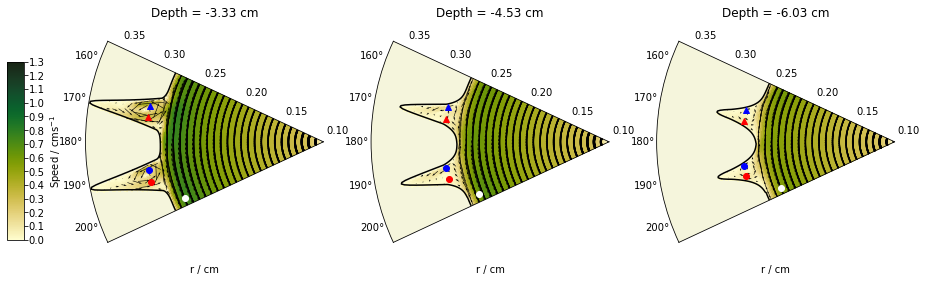

In [5]:
fig = plt.figure(figsize=(14.5,4.5))
ax0 = fig.add_subplot(131, projection='polar')
ax1 = fig.add_subplot(132, projection='polar')
ax2 = fig.add_subplot(133, projection='polar')

ax0.set_facecolor('beige')
ax1.set_facecolor('beige')
ax2.set_facecolor('beige')

nz1 = int(33/0.5)
nz2 = int(45/0.5)
nz3 = int(60/0.5)
tt = 9
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 1.4
min_spd = 0
cbar_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4]
fr = 200
nt = 25

# depth 3.3 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm1 = ax0.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
cbar_ax = fig.add_axes([0.05, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Speed / cms$^{-1}$')
ax0.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')
qv = ax0.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')
ri_st1 = 110
thi_st1 = 310
ax0.plot(Th[thi_st1], R[ri_st1], 'wo')

r1_dns1 = 130
th1_dns1 = 277
ax0.plot(Th[th1_dns1], R[r1_dns1], 'bo')

r1_ups1 = 130
th1_ups1 = 287
ax0.plot(Th[th1_ups1], R[r1_ups1], 'ro')

r1_dns2 = 130
th1_dns2 = 222
ax0.plot(Th[th1_dns2], R[r1_dns2], 'b^')

r1_ups2 = 130
th1_ups2 = 232
ax0.plot(Th[th1_ups2], R[r1_ups2], 'r^')

# depth 4.5 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz2,:,:].data,state.V[tt,nz2,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz2,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz2,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm2 = ax1.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
ax1.contour(Th,R,grid.Depth.data,levels=[0.045],colors='k')
qv = ax1.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')

ri_st2 = 103
thi_st2 = 310
ax1.plot(Th[thi_st2], R[ri_st2], 'wo')

r2_dns1 = 121
th2_dns1 = 277
ax1.plot(Th[th2_dns1], R[r2_dns1], 'bo')

r2_ups1 = 121
th2_ups1 = 287
ax1.plot(Th[th2_ups1], R[r2_ups1], 'ro')

r2_dns2 = 121
th2_dns2 = 221
ax1.plot(Th[th2_dns2], R[r2_dns2], 'b^')

r2_ups2 = 121
th2_ups2 = 232
ax1.plot(Th[th2_ups2], R[r2_ups2], 'r^')

# depth 6.0 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz3,:,:].data,state.V[tt,nz3,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz3,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz3,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm3 = ax2.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
ax2.contour(Th,R,grid.Depth.data,levels=[0.06],colors='k')
qv = ax2.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')
ri_st3 = 90
thi_st3 = 310
ax2.plot(Th[thi_st3], R[ri_st3], 'wo')

r3_dns1 = 112
th3_dns1 = 277
ax2.plot(Th[th3_dns1], R[r3_dns1], 'bo')

r3_ups1 = 112
th3_ups1 = 287
ax2.plot(Th[th3_ups1], R[r3_ups1], 'ro')

r3_dns2 = 112
th3_dns2 = 221
ax2.plot(Th[th3_dns2], R[r3_dns2], 'b^')

r3_ups2 = 112
th3_ups2 = 232
ax2.plot(Th[th3_ups2], R[r3_ups2], 'r^')
ax0.set_xlabel(r'r / cm')
ax0.set_title('Depth = %1.2f cm'%(100*grid.RC[nz1]))
ax1.set_xlabel(r'r / cm')
ax1.set_title('Depth = %1.2f cm'%(100*grid.RC[nz2]))
ax2.set_xlabel(r'r / cm')
ax2.set_title('Depth = %1.2f cm'%(100*grid.RC[nz3]))
ax0.set_aspect(1)
ax0.set_xlim(np.pi*155/180,np.pi*205/180)
ax0.set_ylim(0.1,0.365)
ax1.set_aspect(1)
ax1.set_xlim(np.pi*155/180,np.pi*205/180)
ax1.set_ylim(0.1,0.365)
ax2.set_aspect(1)
ax2.set_xlim(np.pi*155/180,np.pi*205/180)
ax2.set_ylim(0.1,0.365)

#ax0.set_theta_offset((-np.pi*155)/180)
print('time = %1.0f s' %(tt*5))    
plt.show()

time = 45 s


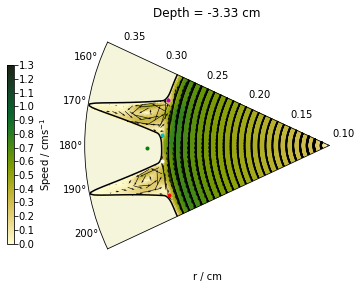

In [6]:
fig = plt.figure(figsize=(6,4.5))
ax0 = fig.add_subplot(111, projection='polar')

ax0.set_facecolor('beige')

nz1 = int(33/0.5)
tt = 9
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 1.4
min_spd = 0
cbar_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4]
fr = 200
nt = 25

# depth 3.3 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm1 = ax0.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
cbar_ax = fig.add_axes([0.05, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Speed / cms$^{-1}$')
ax0.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')
qv = ax0.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')
ri_st1 = 120
thi_st1 = 298
ax0.plot(Th[thi_st1], R[ri_st1], 'ro', markersize=3)

ri_st1 = 120
thi_st1 = 267
ax0.plot(Th[thi_st1], R[ri_st1], 'wo', markersize=3)

ri_st1 = 120
thi_st1 = 243
ax0.plot(Th[thi_st1], R[ri_st1], 'co', markersize=3)

ri_st1 = 120
thi_st1 = 212
ax0.plot(Th[thi_st1], R[ri_st1], 'mo', markersize=3)

r1_half = 130
th1_half = 243+12
ax0.plot(Th[th1_half], R[r1_half], 'go', markersize=3)

ax0.set_xlabel(r'r / cm')
ax0.set_title('Depth = %1.2f cm'%(100*grid.RC[nz1]))
ax0.set_aspect(1)
ax0.set_xlim(np.pi*155/180,np.pi*205/180)
ax0.set_ylim(0.1,0.365)

#ax0.set_theta_offset((-np.pi*155)/180)
print('time = %1.0f s' %(tt*5))    
plt.show()

In [108]:
def get_vel_diff_ups_dns(state, Th, R, maskC,component='radial', tt=0, dep=33):
    '''
    Get the velocity difference between upstream and downtream canyons. 
    Choose between the speed difference or the difference in radial or azimuthal velocity.
    INPUT
       state :: xarray dataset xr.open_dataset(state_file)
       Th  :: array, np.pi*grid.X/180
       R   :: array, grid.Y
       maskC :: mask array, land mask at cell center (3D)
       component :: str, choose  between 'speed', 'radial' or 'azimuthal'.
       tt  :: int, time index to extract, default is 0
       dep :: float, depth to plot at in milimiters, default is 33 mm
    OUTPUT
       vel_out:: array, 2D array with the difference between upstream 
       and downstream canyon velocity component at depth dep.
       '''
    # ups and dns canyon azimuthal indices at depth:
    ups1_th = 255
    ups2_th = 310
    dns1_th = 200
    dns2_th = 255
    nz = int(dep/0.5)
    thmesh, rmesh = np.meshgrid(Th,R)
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz,:,:].data,state.V[tt,nz,:,:].data)
    
    if component == 'speed':
        thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz,:,:]))
        rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz,:,:]))
        ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
        uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
        vel_out = np.sqrt(ux**2+uy**2)
    
    elif component == 'radial':
        rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz,:,:]))
        vel_out = rvel 
    
    elif component == 'azimuthal':
        thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz,:,:]))
        vel_out = thvel
    
    else:
        raise Exception(component+' is not a valid option. Choose between speed, radial or azimuthal') 
    
    return(vel_out[:,ups1_th:ups2_th]-vel_out[:,dns1_th:dns2_th])

def plot_vel_diff_ups_dns(state, Th, R, maskC, RC, component='speed', dep=33,
                          vmax=0.4, vmin=-0.4, nsep=9, xlab = 'Speed difference / cms$^{-1}$', 
                          ylim=0.365, run='', Bu=0, Rw=0, prof=''):
    '''plot the difference between ups and dns canyons at a particular depth, for some variable fld, at 8 times
    INPUT
    state :: xarray dataset xr.open_dataset(state_file)
    Th  :: array, np.pi*grid.X/180
    R   :: array, grid.Y
    maskC :: mask array, land mask at cell center (3D)
    RC :: array, depths, grid.RC
    component :: str, choose  between 'speed', 'radial' or 'azimuthal'.
    dep :: float, depth to plot at in milimiters, default is 33 mm
    vmax:: float, upper limit of colormap
    vmax:: float, lower limit of colormap
    nsep:: int, number of segments in colorbar (cbar_ticks=np.arange(vmin,vmax,nsep))
    xlab:: str, label for colorbar
    ylim:: float, upper limit for radial axis (between 0.1 and 0.5 m)
    run :: str, run identifier
    '''
    # ups and dns canyon limit indices:
    ups1_th = 255
    ups2_th = 310
    dns1_th = 200
    dns2_th = 255
    nz = int(dep/0.5)
    max_spd = vmax
    min_spd = vmin
    cbar_ticks = np.linspace(vmin,vmax,nsep)

    fig = plt.figure(figsize=(14,6.5))
    ax0 = fig.add_subplot(241, projection='polar')
    ax1 = fig.add_subplot(242, projection='polar')
    ax2 = fig.add_subplot(243, projection='polar')
    ax3 = fig.add_subplot(244, projection='polar')
    ax4 = fig.add_subplot(245, projection='polar')
    ax5 = fig.add_subplot(246, projection='polar')
    ax6 = fig.add_subplot(247, projection='polar')
    ax7 = fig.add_subplot(248, projection='polar')

    axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]
 
    for tt, ax in zip(range(1,17,2),axs):
        ax.set_facecolor('beige')
        fld = get_vel_diff_ups_dns(state, Th, R, maskC, component=component, tt=tt, dep=dep)
        
        # Plot upstream - downstream canyons
        pcm1 = ax.pcolormesh(Th[dns1_th:dns2_th],R[:],100*fld,
                             cmap=cmo.cm.balance, 
                             vmin=min_spd, vmax=max_spd)
        ax.contour(Th,R,grid.Depth.data,levels=[33*1E-3],colors='0.2', alpha=0.5)
        ax.contour(Th,R,grid.Depth.data,levels=[dep*1E-3],colors='k')
        
        ax.set_title('time = %1.0f s' %(tt*5))
        ax.set_aspect(1)
        ax.set_xlim(np.pi*160/180,np.pi*180/180)
        ax.set_ylim(0.1,ylim)
        #ax0.set_theta_offset((-np.pi*155)/180)

    cbar_ax = fig.add_axes([0.95, 0.2, 0.016, 0.55])
    cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
    cb.ax.yaxis.set_tick_params(pad=1)
    cb.set_label(xlab) 
    ax4.set_xlabel(r'r / cm')
    ax5.set_xlabel(r'r / cm')
    ax6.set_xlabel(r'r / cm')
    ax7.set_xlabel(r'r / cm')
    title = "%s (%s) \n z=%1.2f cm \n Bu=%1.2f \n Rw=%1.2f" %(run,prof,100*RC[nz], Bu, Rw)
    plt.text(1.4,0.8, title, ha='center', fontweight='bold',bbox=dict(facecolor='gray', alpha=0.2), transform=ax3.transAxes)
    return(fig)

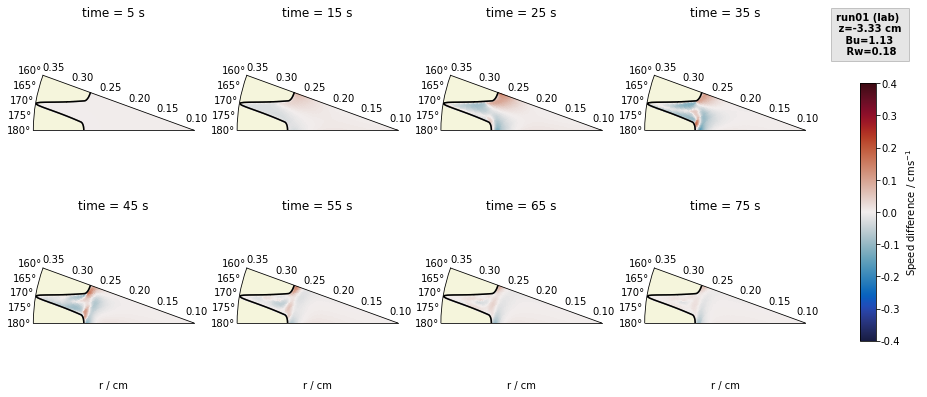

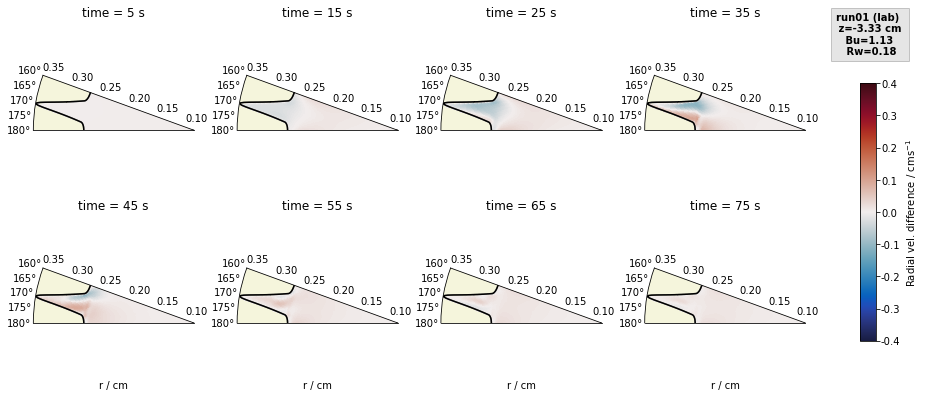

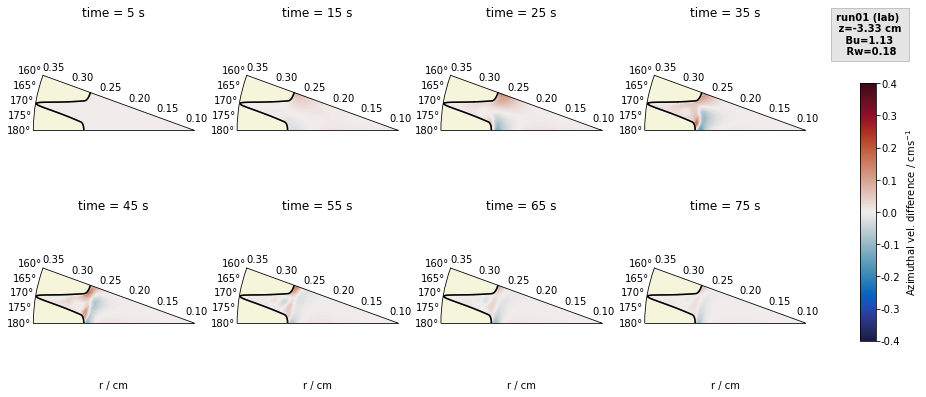

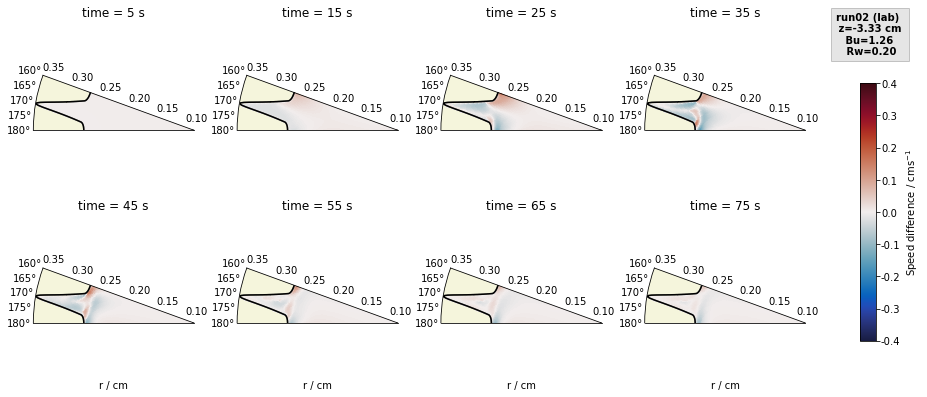

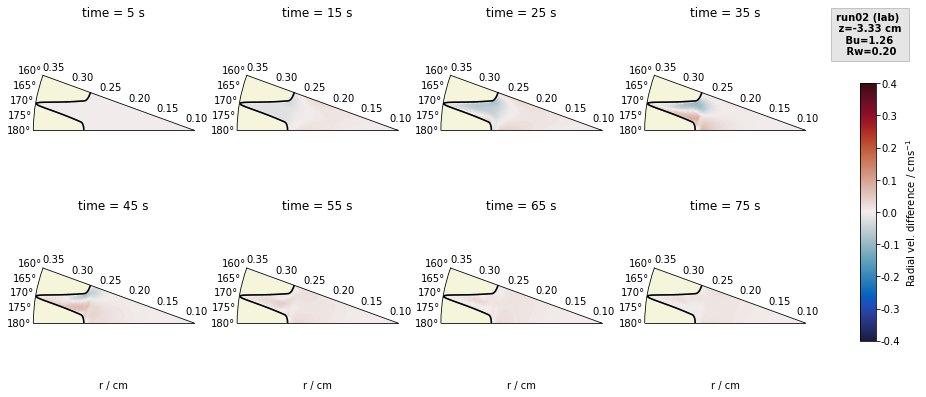

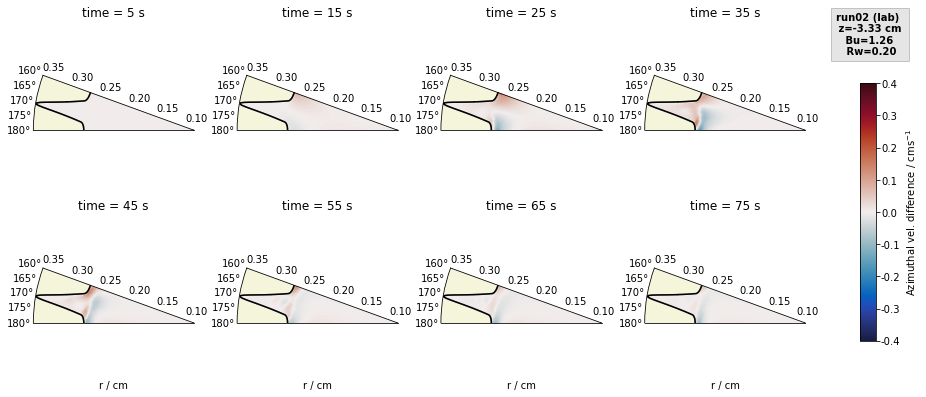

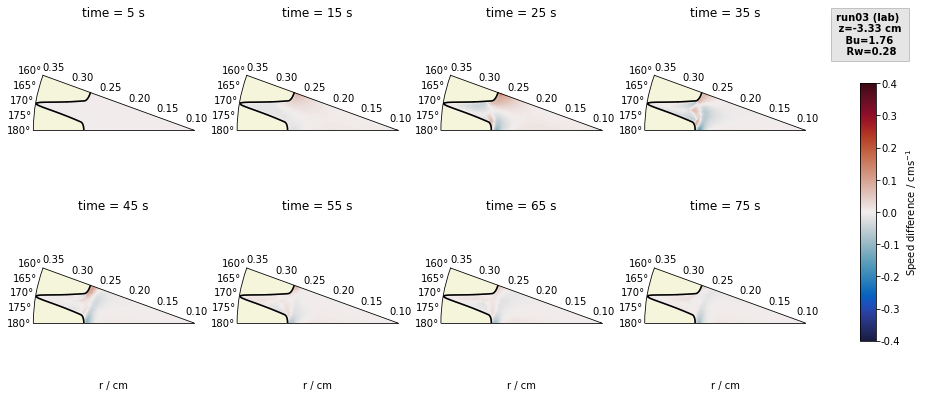

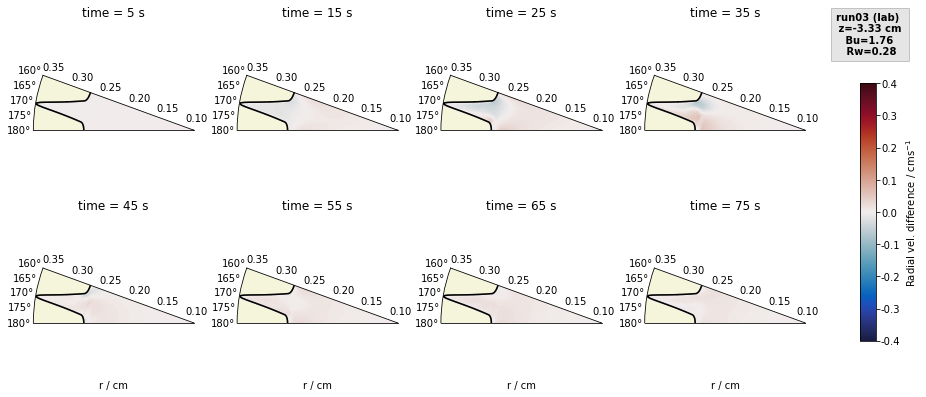

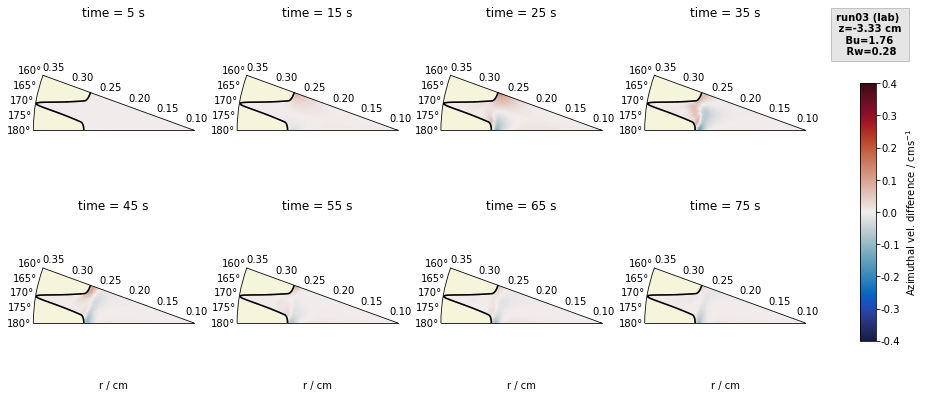

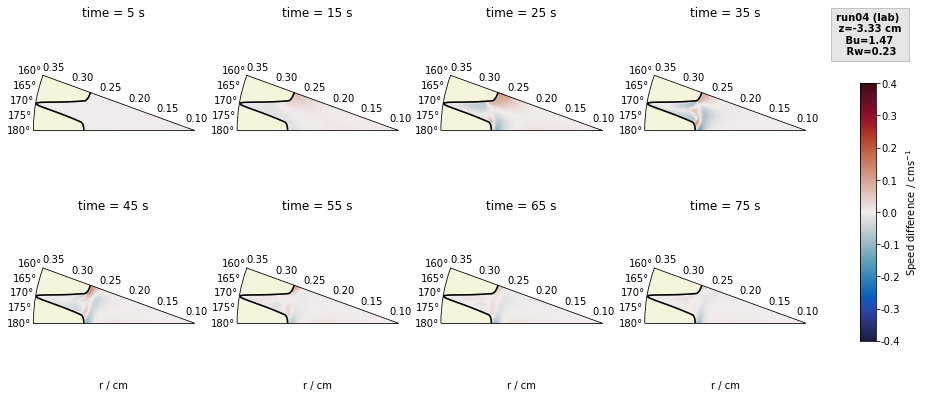

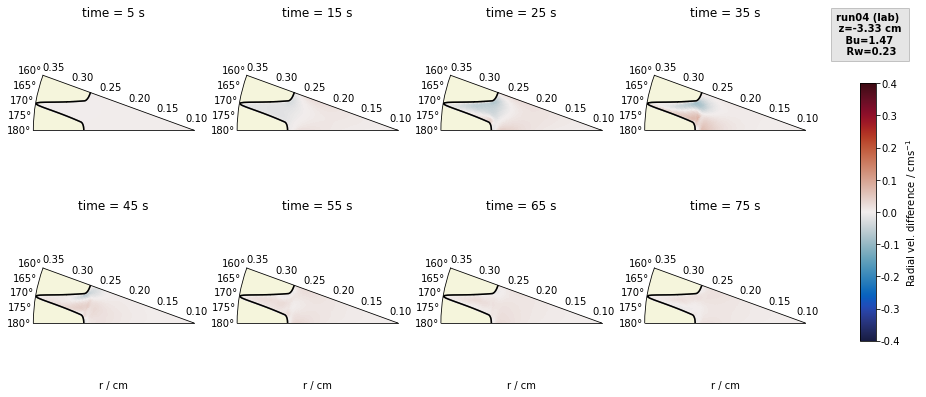

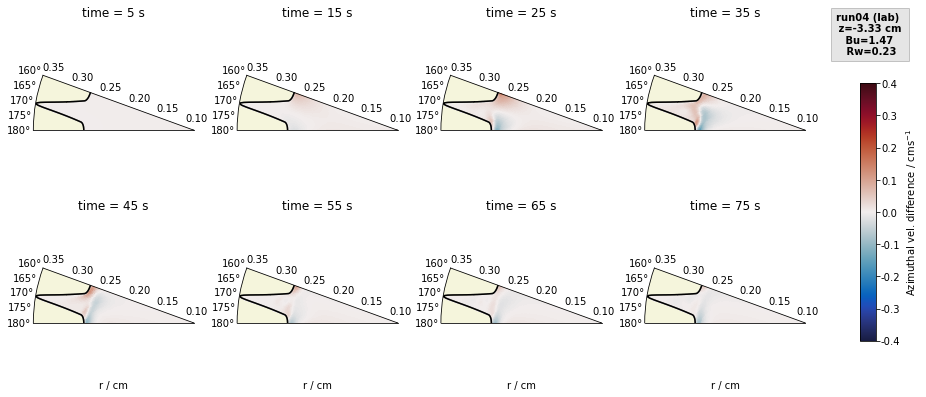

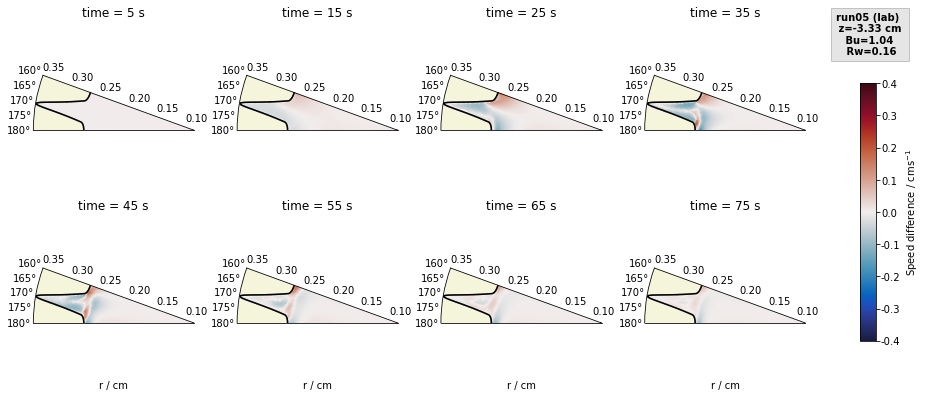

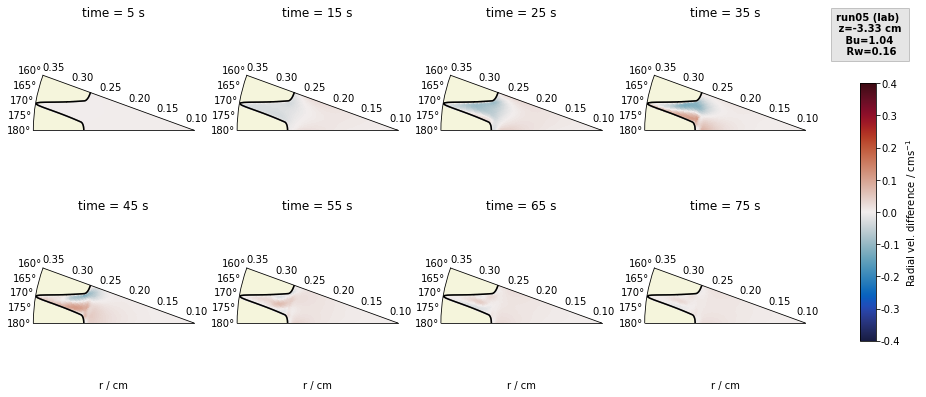

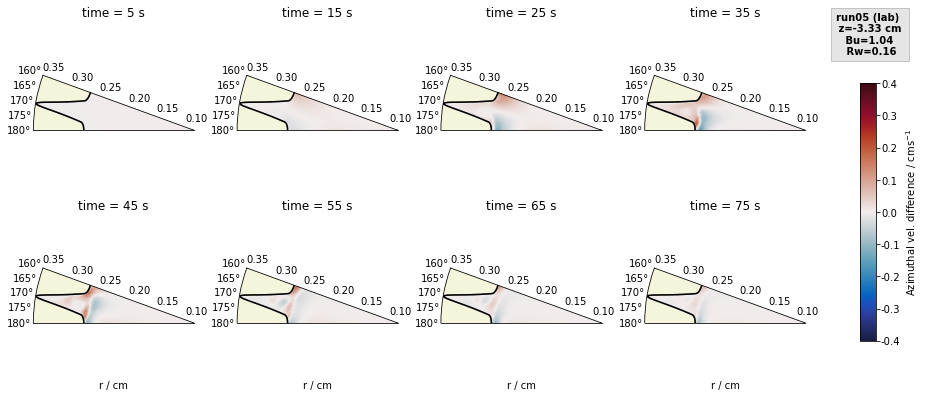

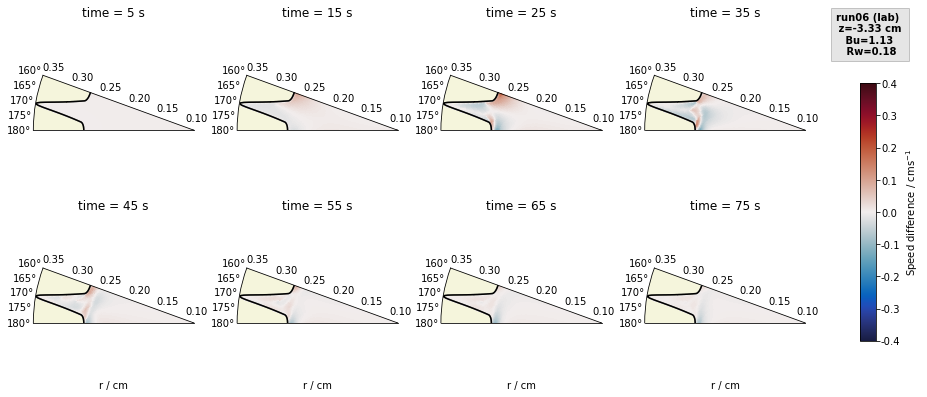

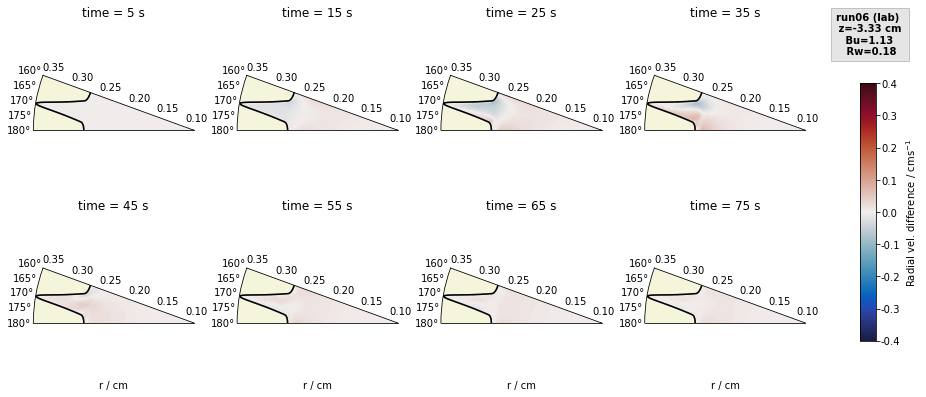

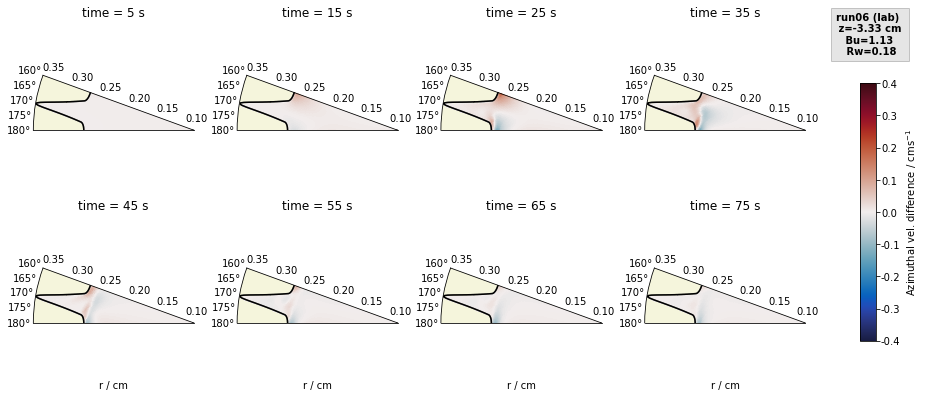

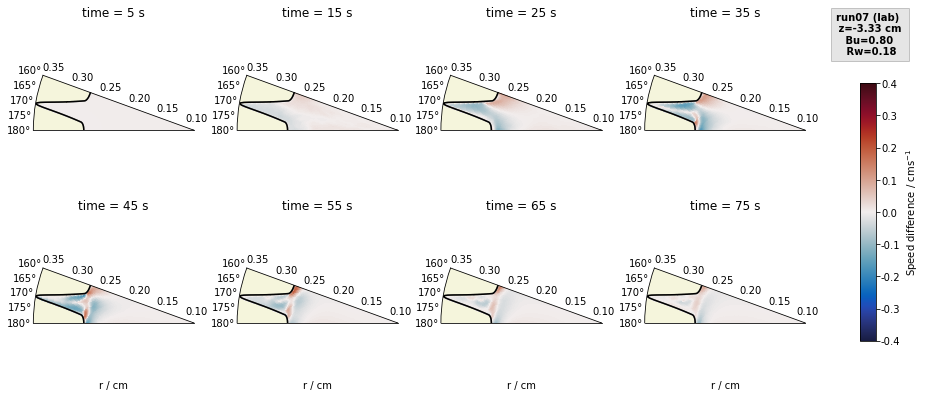

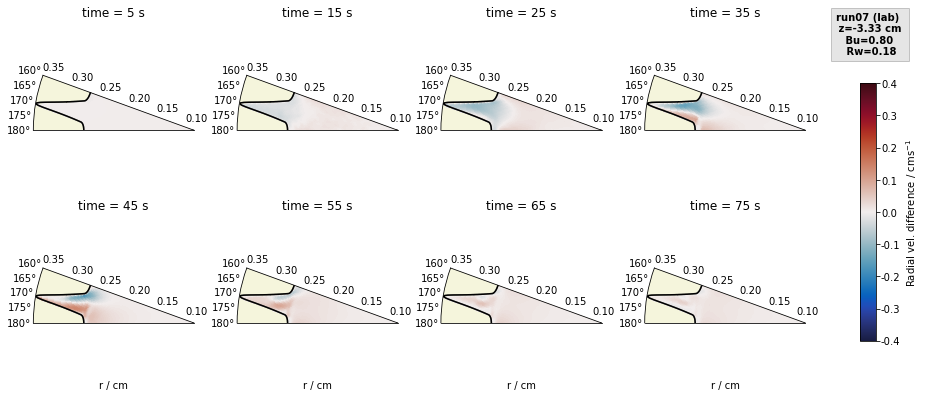

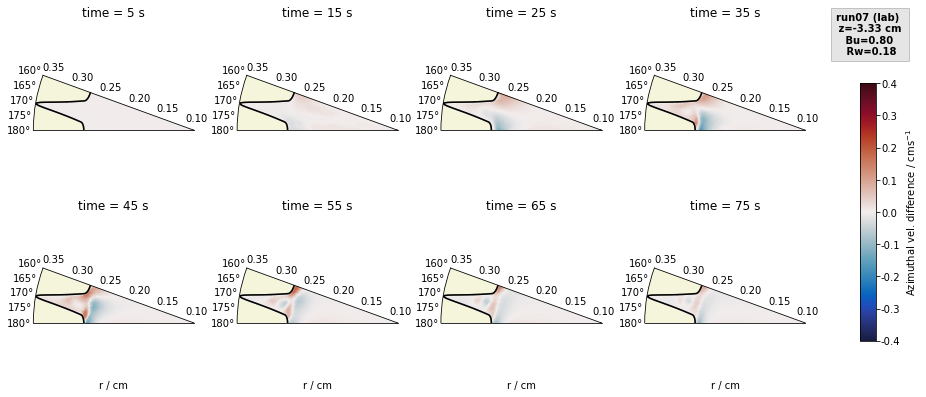

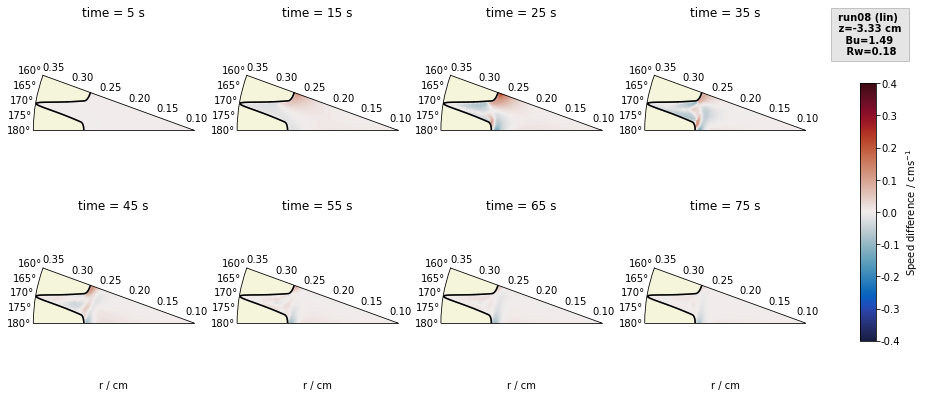

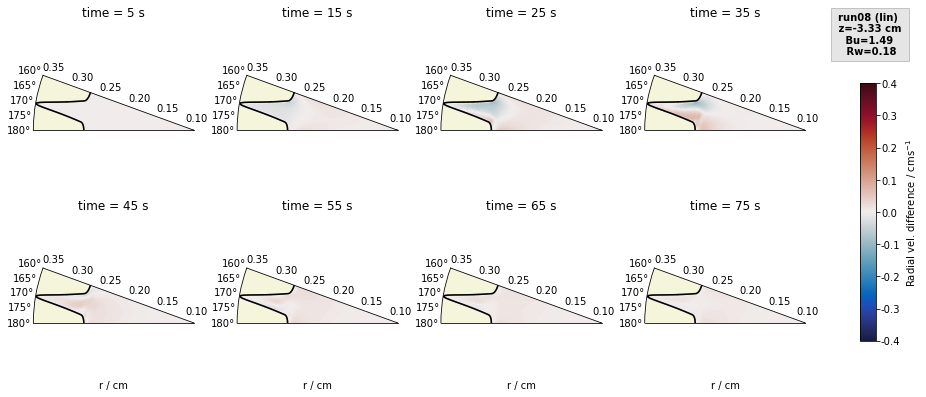

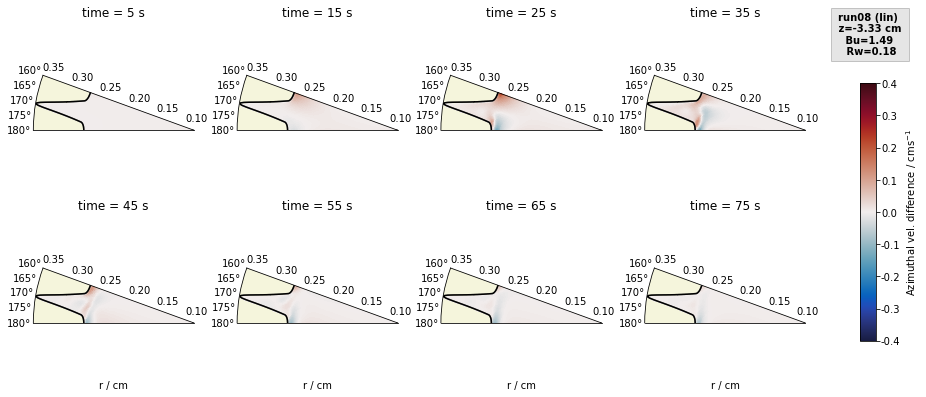

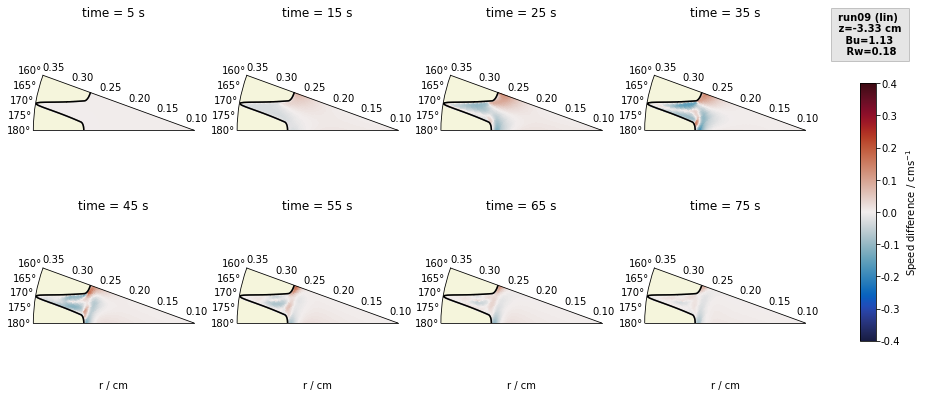

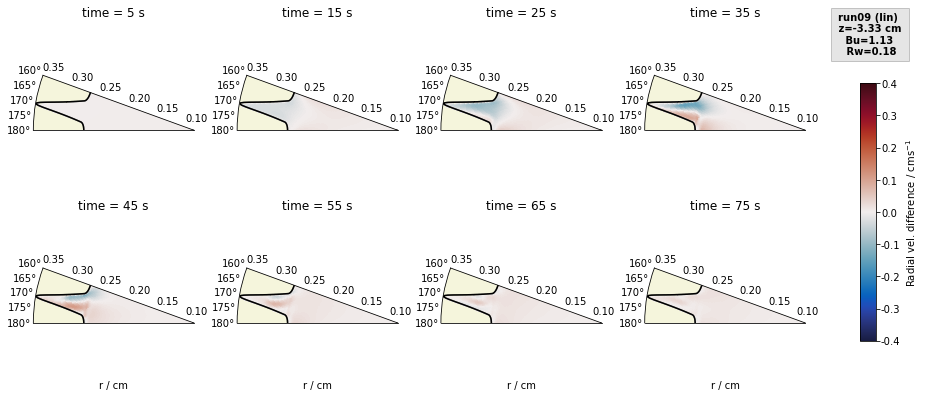

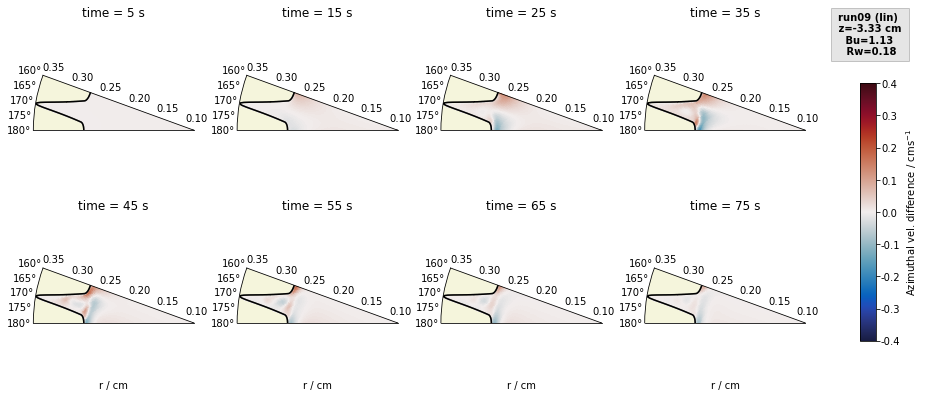

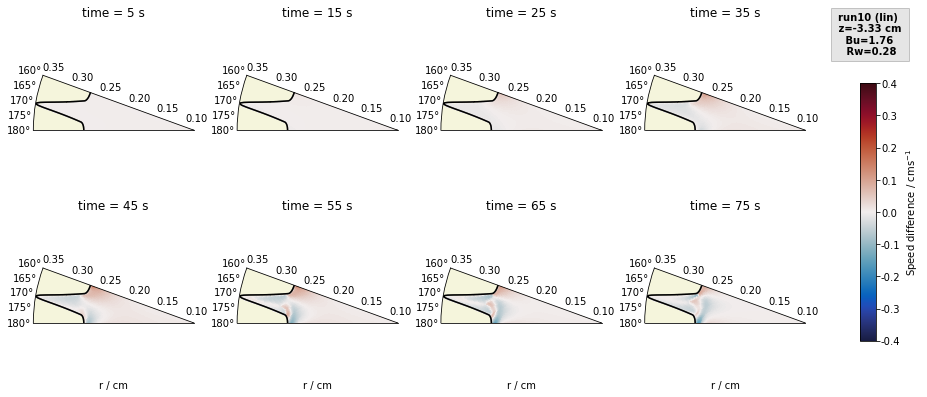

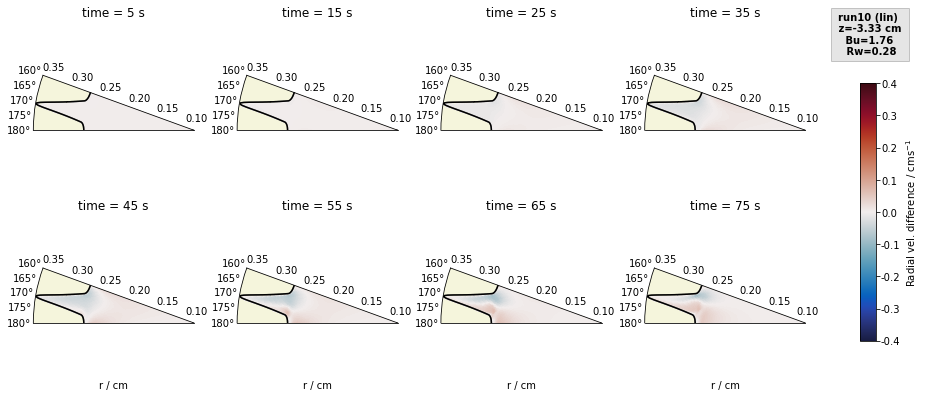

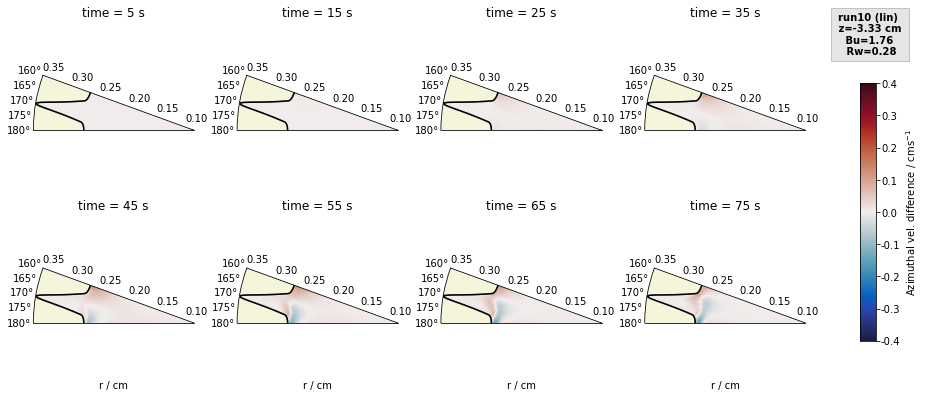

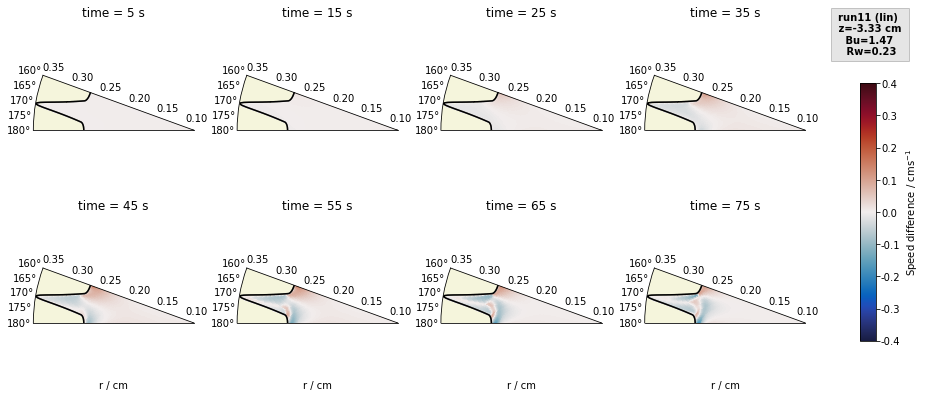

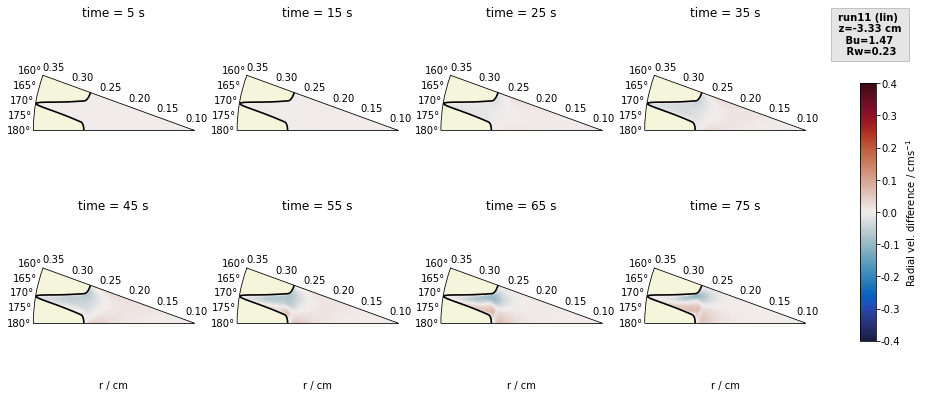

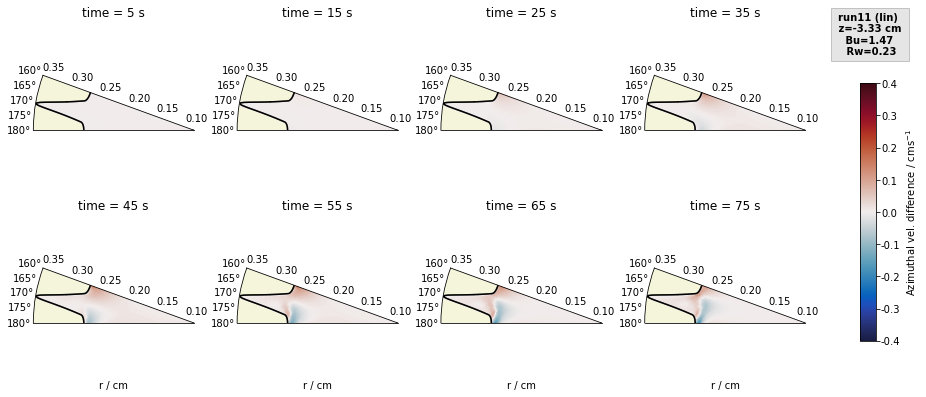

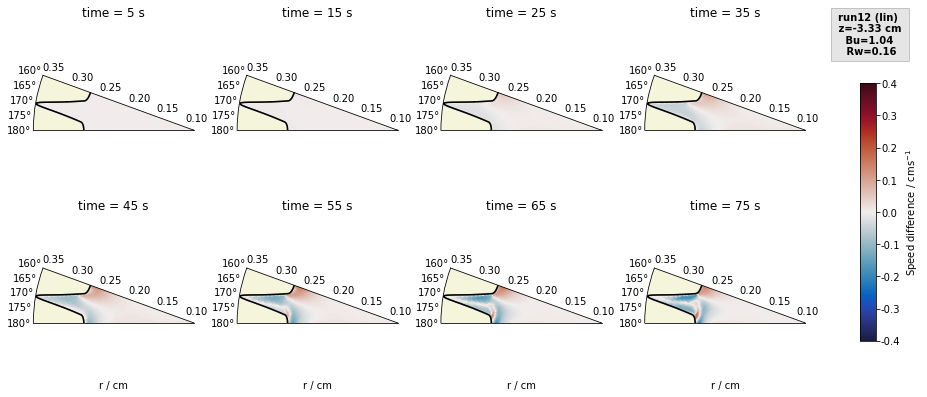

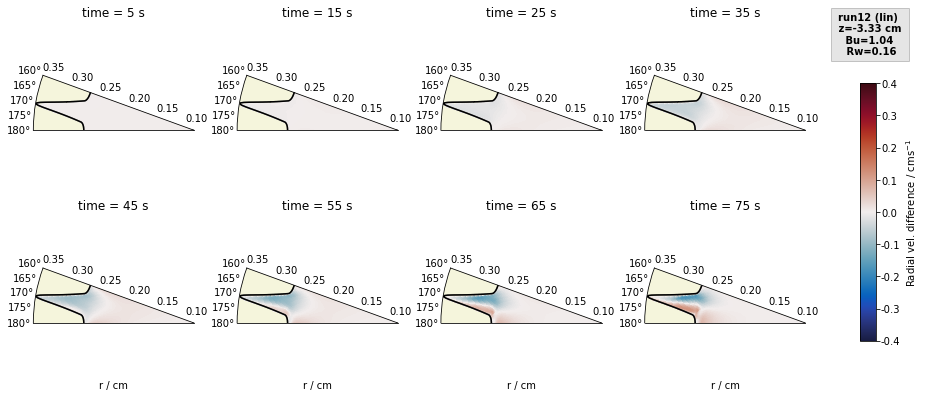

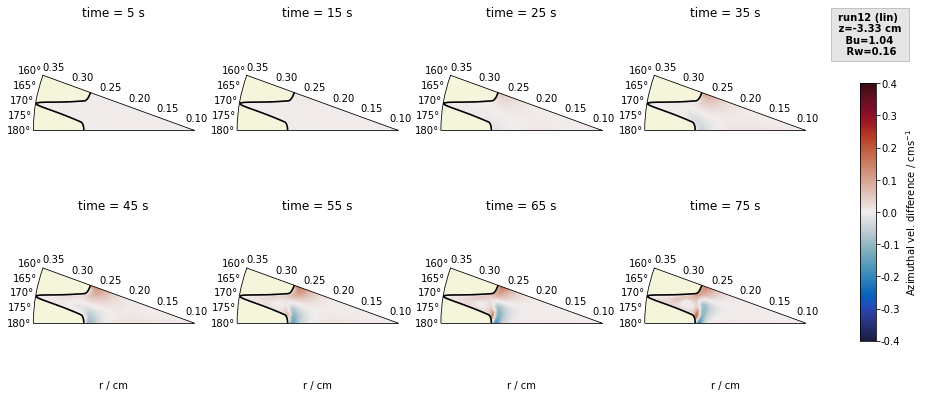

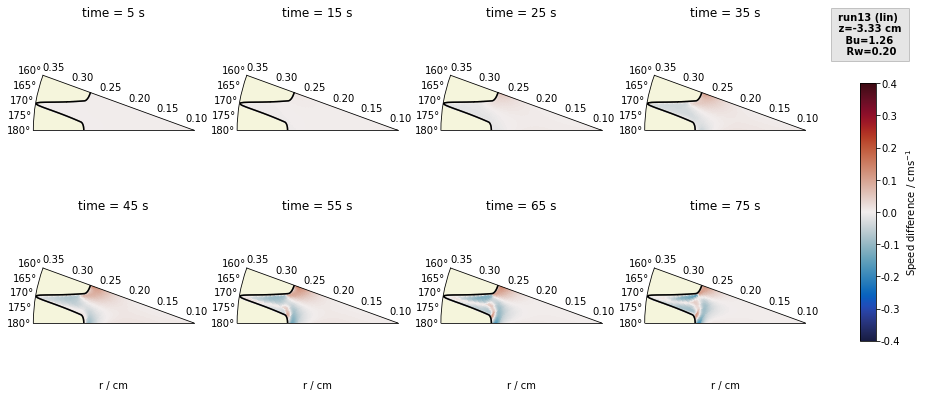

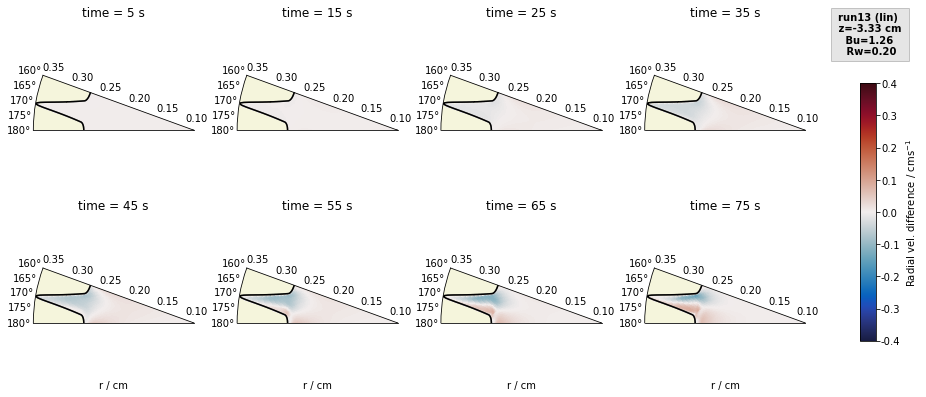

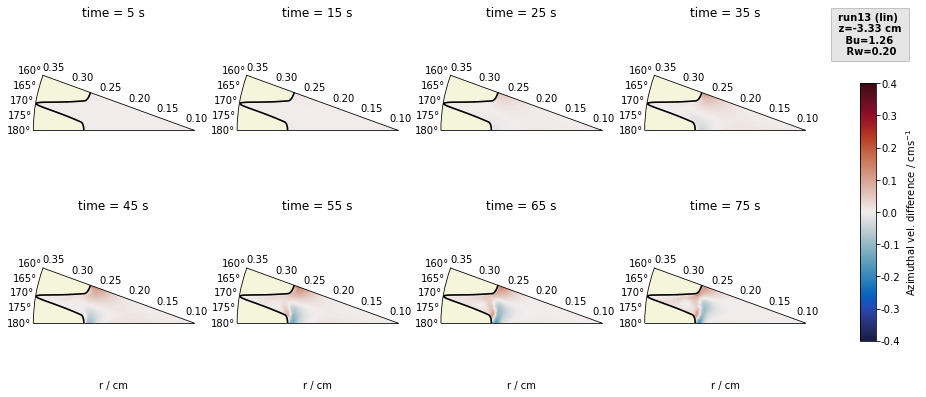

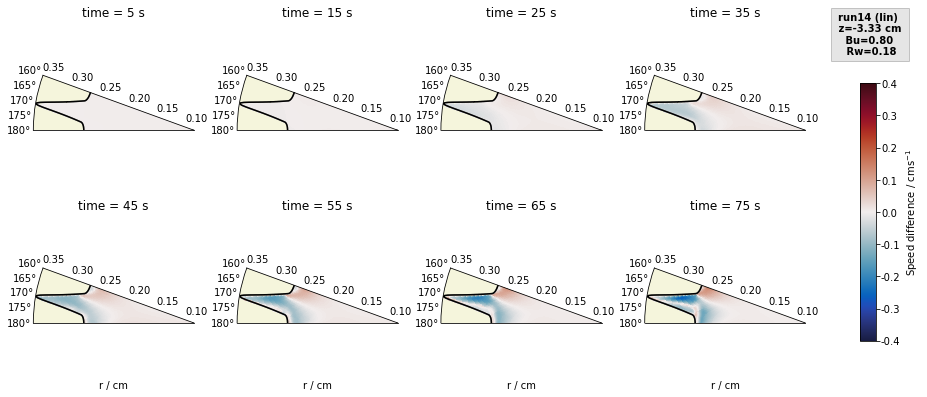

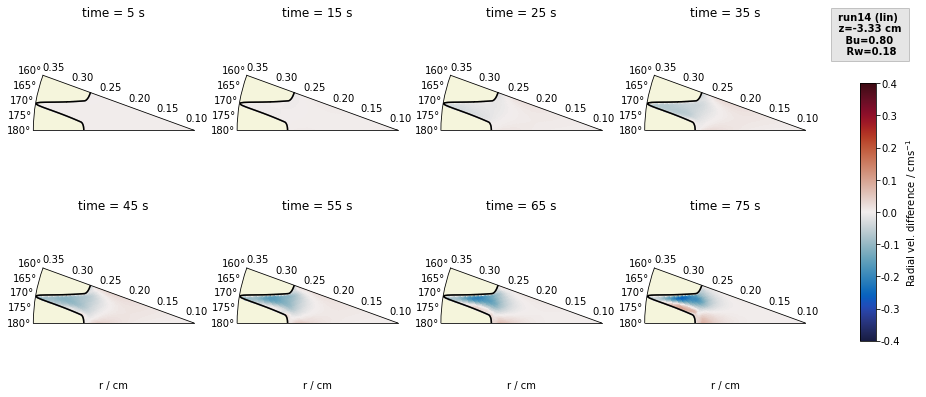

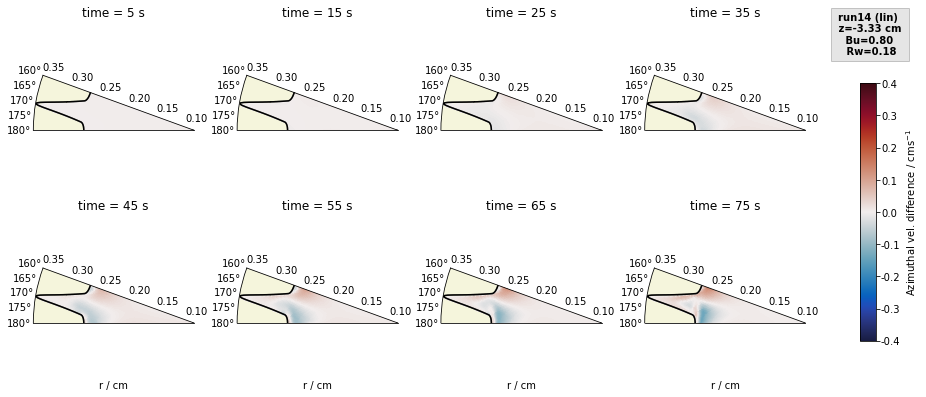

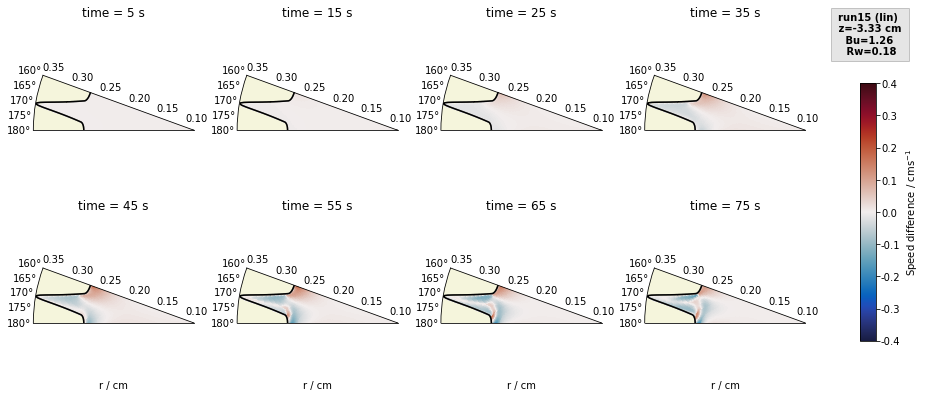

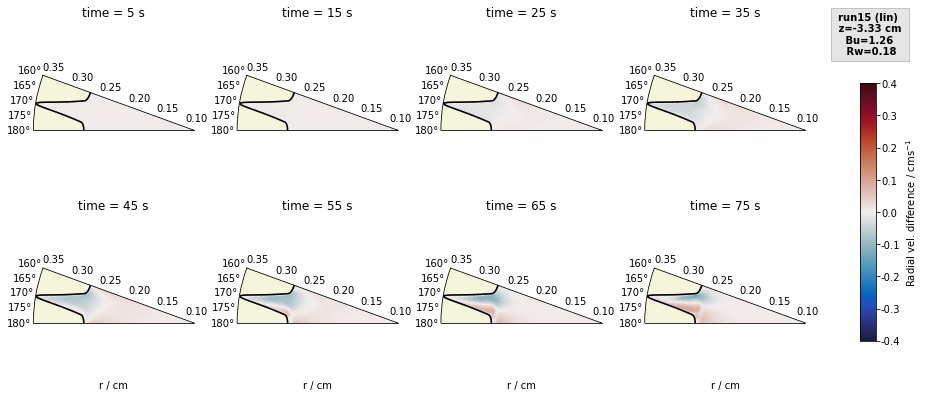

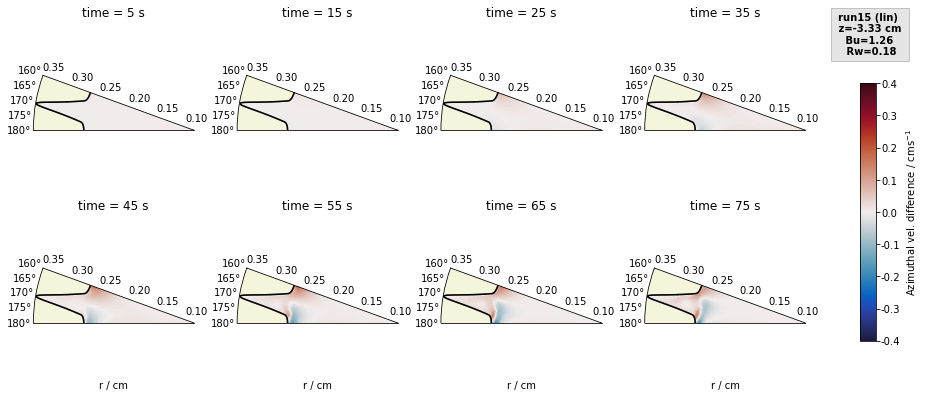

In [110]:
# Plot differences in spd, ur, uth between ups and dns at 3.3 cm for all run:
dep = 33 # mm
runs = ['run01','run02','run03','run04','run05',
        'run06','run07','run08','run09','run10',
        'run11','run12','run13','run14','run15']
Bus = [1.13,1.26,1.76,1.47,1.04,
       1.13,0.80,1.49,1.13,1.76,
       1.47,1.04,1.26,0.80,1.26]
Rws = [0.18,0.20,0.28,0.23,0.16,
       0.18,0.18,0.18,0.18,0.28,
       0.23,0.16,0.20,0.18,0.18]
profiles = ['lab','lab','lab','lab','lab','lab','lab',
        'lin','lin','lin','lin','lin','lin','lin','lin'] # salinity profile

for run, Bu, Rw, prof in zip(runs, Bus, Rws, profiles):
    
    # Open glued state file from model
    state_file = f'/Volumes/balaenopter/BF5_from_PIV_two_canyons/{run}/stateGlob.nc' # balaenopter
    state = xr.open_dataset(state_file)

    # Speed difference
    fig = plot_vel_diff_ups_dns(state, Th, R, maskC, grid.RC, component='speed', dep=dep, 
                                vmax=0.4, 
                                vmin=-0.4,
                                nsep=9, 
                                xlab='Speed difference / cms$^{-1}$',
                                run=run, Bu=Bu, Rw=Rw, prof=prof)
    figname = f"spd_{run}_{dep}mm.png"
    plt.savefig(figname,bbox_inches='tight')

    # radial velocity difference
    fig = plot_vel_diff_ups_dns(state, Th, R, maskC, grid.RC, component='radial', dep=dep, 
                                vmax=0.4, 
                                vmin=-0.4,
                                nsep=9, 
                                xlab='Radial vel. difference / cms$^{-1}$',
                                run=run, Bu=Bu, Rw=Rw, prof=prof)
    figname = f"rad_{run}_{dep}mm.png"
    plt.savefig(figname,bbox_inches='tight')

    # azimuthal velocity difference
    fig = plot_vel_diff_ups_dns(state, Th, R, maskC, grid.RC, component='azimuthal', dep=dep, 
                                vmax=0.4, 
                                vmin=-0.4,
                                nsep=9, 
                                xlab='Azimuthal vel. difference / cms$^{-1}$',
                                run=run, Bu=Bu, Rw=Rw, prof=prof)
    figname = f"azi_{run}_{dep}mm.png"
    plt.savefig(figname,bbox_inches='tight',facecolor='w' )

In [17]:
state

<xarray.Dataset>
Dimensions:  (T: 17, X: 512, Xp1: 513, Y: 266, Yp1: 267, Z: 175, Zl: 175)
Coordinates:
  * T        (T) float64 0.0 5.0 10.0 15.0 20.0 ... 60.0 65.0 70.0 75.0 80.0
  * X        (X) float64 1.122 3.363 5.594 7.807 ... 354.5 356.6 358.8 361.0
  * Xp1      (Xp1) float64 0.0 2.244 4.482 6.705 ... 355.5 357.7 359.9 362.1
  * Y        (Y) float64 0.1008 0.1023 0.1038 0.1053 ... 0.4977 0.4992 0.5008
  * Yp1      (Yp1) float64 0.1 0.1015 0.103 0.1045 ... 0.497 0.4985 0.5 0.5015
  * Z        (Z) float64 -0.00025 -0.00075 -0.00125 ... -0.0925 -0.0935 -0.0945
  * Zl       (Zl) float64 0.0 -0.0005 -0.001 -0.0015 ... -0.092 -0.093 -0.094
Data variables:
    Eta      (T, Y, X) float32 ...
    S        (T, Z, Y, X) float32 ...
    Temp     (T, Z, Y, X) float32 ...
    U        (T, Z, Y, Xp1) float32 ...
    V        (T, Z, Yp1, X) float32 ...
    W        (T, Zl, Y, X) float32 ...
    iter     (T) int32 ...
Attributes:
    MITgcm_version:  checkpoint67q
    build_user:      kramosmu
    build_host:      seawolf3
    build_date:      Wed Jul 29 16:06:11 PDT 2020
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    MITgcm_mnc_ver:  0.9
    sNx:             16
    sNy:             19
    OLx:             3
    OLy:             3
    nSx:             2
    nSy:             2
    nPx:             16
    nPy:             7
    Nx:              512
    Ny:              266
    Nr:              175
    history:         Tue Aug  4 15:43:06 2020: ncks -4 -L4 -O stateGlob.nc st...
    NCO:             "4.5.2"

In [13]:
np.argmax(np.fliplr(rvel.data), axis=0)

array([112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112,
       112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 113, 113,
       113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113,
       113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113,
       113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113,
       113, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112,
       112, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111,
       111, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 119, 119, 119, 118, 118, 118, 118, 118, 118, 118, 118, 118,
       118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118,
       118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118,
       118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118,
       118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 11